## Importing necessary libraries


In [1]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
%matplotlib inline

## Load the training and testing data (MNIST)

In [3]:
#importing dataset and splitting into train and test data
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 5s 0us/step


In [4]:
#to se length of traning dataset
len(x_train)

60000

In [5]:
#to see the lengh of testing data
len(x_test)

10000

In [6]:
x_train.shape

(60000, 28, 28)

In [7]:
#we want to see first image

x_train[0]

#It is showing image of matrix of size 28*28 pixels(Total 784 features)
#each feature represents the intensity between 0 to 255

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

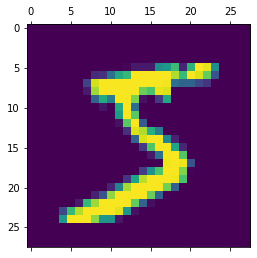

In [28]:
#to see how first image look
plt.matshow(x_train[0])

In [9]:
#normalize the images by scaling pixel intensities to the range 0,1
#Normalization is a technique for organizing data in a database.

x_train = x_train / 255
x_test = x_test / 255

#here 255 is maximum value of intensity that's why it is divided by 255

In [10]:
x_train[0]


array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

### Creating the model

The ReLU function is one of the most popular activation functions. It stands for “rectified linear unit”. Mathematically this function is defined as: y = max(0,x)The ReLU function returns “0” if the input is negative and is linear if the input is positive.

The softmax function is another activation function. It changes input values into values that reach from 0 to 1.

In [11]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),   #Input layer
    keras.layers.Dense(128, activation='relu'),   #hidden layer abs
    keras.layers.Dense(10, activation='softmax')  #output layer
])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


## Compile the model

In [13]:
model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Train the model

In [14]:
history=model.fit(x_train, y_train,validation_data=(x_test,y_test),epochs=10)



Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.6315 - accuracy: 0.8443 - val_loss: 0.3576 - val_accuracy: 0.9025
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3385 - accuracy: 0.9055 - val_loss: 0.2925 - val_accuracy: 0.9175
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2911 - accuracy: 0.9185 - val_loss: 0.2623 - val_accuracy: 0.9252
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2609 - accuracy: 0.9266 - val_loss: 0.2388 - val_accuracy: 0.9331
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2383 - accuracy: 0.9334 - val_loss: 0.2204 - val_accuracy: 0.9381
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2195 - accuracy: 0.9392 - val_loss: 0.2053 - val_accuracy: 0.9439
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2039 - accuracy: 0.9430 - val_loss: 0.1934 - val_accuracy:

## Evaluate the model


In [15]:
test_loss,test_acc=model.evaluate(x_test,y_test)
print("Loss=%.3f" %test_loss)
print("Accuracy=%.3f" %test_acc)

313/313 [==============================] - 0s 914us/step - loss: 0.1654 - accuracy: 0.9530
Loss=0.165
Accuracy=0.953


## Making Prediction on New Data

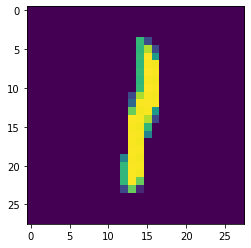

In [31]:
n=random.randint(0,9999)
plt.imshow(x_test[n])
plt.show()

In [32]:
#we use predict() on new data
predicted_value=model.predict(x_test)
print("Handwritten number in the image is= %d" %np.argmax(predicted_value[n]))

313/313 [==============================] - 0s 821us/step
Handwritten number in the image is= 1


## Plot graph for Accuracy and Loss

In [18]:
history.history??

In [19]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

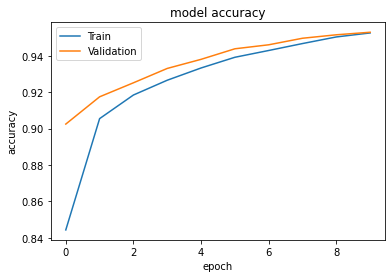

In [20]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

Graph represents model accuracy

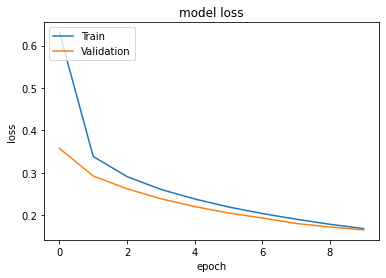

In [21]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

graph represents the model’s loss

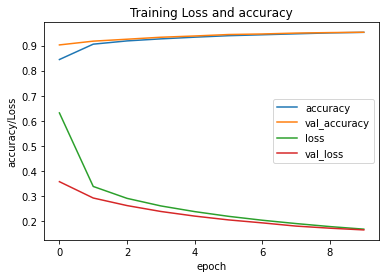

In [22]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training Loss and accuracy')
plt.ylabel('accuracy/Loss')
plt.xlabel('epoch')
plt.legend(['accuracy', 'val_accuracy','loss','val_loss'])
plt.show()

Conclusion: With above code We can see, that throughout the epochs, our model accuracy increases and our model loss decreases,that is good since our model gains confidence with its predictions.

1. The two losses (loss and val_loss) are decreasing and the accuracy 
   (accuracy and val_accuracy)are increasing. 
    So this indicates the model is trained in a good way.

2. The val_accuracy is the measure of how good the predictions of your model are. 
   So In this case, it looks like the model is well trained after 10 epochs

In [23]:
pwd


'C:\\Users\\Varun Sonawane\\Deep Learning 7th sem'

## Save the model

In [24]:
keras_model_path='C:\\Users\\Varun Sonawane\\Deep Learning 7th sem'
model.save(keras_model_path)

INFO:tensorflow:Assets written to: C:\Users\Varun Sonawane\Deep Learning 7th sem\assets


In [25]:
#use the save model
restored_keras_model = tf.keras.models.load_model(keras_model_path)